# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from tensorflow.keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

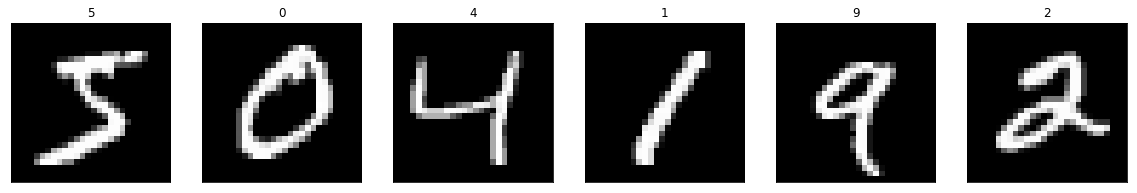

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

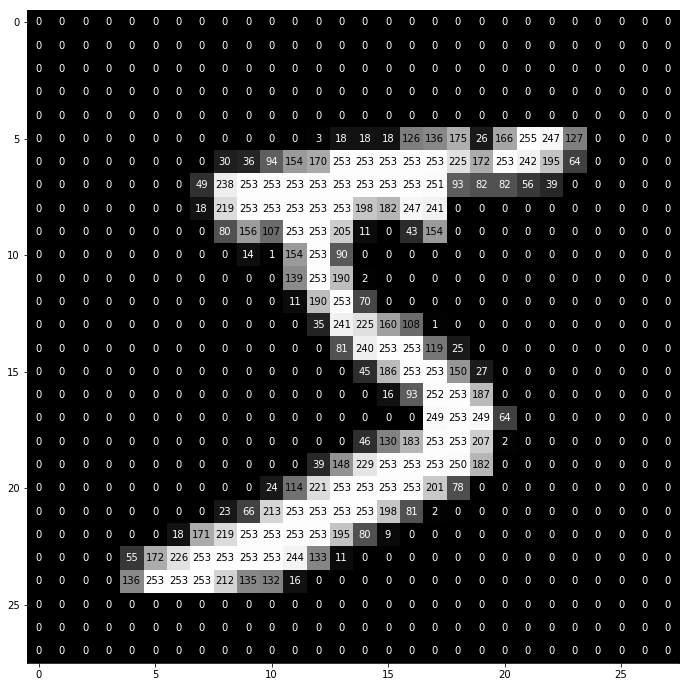

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
from tensorflow.keras import utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten


# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)      

### 7. Compile the Model

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [9]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 10.4100%


### 9. Train the Model

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
47744/48000 [============================>.] - ETA: 0s - loss: 13.8809 - acc: 0.1363
Epoch 00001: val_loss improved from inf to 14.37177, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 20s 408us/sample - loss: 13.8787 - acc: 0.1364 - val_loss: 14.3718 - val_acc: 0.1079
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 13.4275 - acc: 0.1654
Epoch 00002: val_loss improved from 14.37177 to 11.60681, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 17s 353us/sample - loss: 13.4259 - acc: 0.1655 - val_loss: 11.6068 - val_acc: 0.2718
Epoch 3/10
47744/48000 [============================>.] - ETA: 0s - loss: 13.0083 - acc: 0.1914
Epoch 00003: val_loss improved from 11.60681 to 11.52837, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 16s 335us/s

### 11. Calculate the Classification Accuracy on the Test Set

In [10]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 96.5000%


# Try-outs

## 1. Number of hidden nodes

### 1.1 Increase

In [11]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.6184 - acc: 0.8049
Epoch 00001: val_loss improved from inf to 0.18904, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 38s 802us/sample - loss: 0.6176 - acc: 0.8051 - val_loss: 0.1890 - val_acc: 0.9464
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.3326 - acc: 0.9077
Epoch 00002: val_loss improved from 0.18904 to 0.16998, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 37s 776us/sample - loss: 0.3322 - acc: 0.9077 - val_loss: 0.1700 - val_acc: 0.9560
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.3011 - acc: 0.9226
Epoch 00003: val_loss improved from 0.16998 to 0.15514, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 37s 765us/sample - loss: 0.3019 - acc: 0.9225 - val_loss: 0.1551 - val_

### 1.2 Decrease

In [12]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47616/48000 [============================>.] - ETA: 0s - loss: 1.1708 - acc: 0.6060
Epoch 00001: val_loss improved from inf to 0.32233, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 11s 234us/sample - loss: 1.1672 - acc: 0.6074 - val_loss: 0.3223 - val_acc: 0.9159
Epoch 2/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.6011 - acc: 0.8283
Epoch 00002: val_loss improved from 0.32233 to 0.26080, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 9s 178us/sample - loss: 0.6000 - acc: 0.8285 - val_loss: 0.2608 - val_acc: 0.9305
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.5133 - acc: 0.8612
Epoch 00003: val_loss improved from 0.26080 to 0.24310, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 8s 176us/sample - loss: 0.5131 - acc: 0.8613 - val_loss: 0.2431 - val_ac

## 2. Number of hidden layers

### 2.1 Increase

In [13]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 1.4414 - acc: 0.4992
Epoch 00001: val_loss improved from inf to 0.40815, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 25s 525us/sample - loss: 1.4391 - acc: 0.5001 - val_loss: 0.4082 - val_acc: 0.9033
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.6726 - acc: 0.8099
Epoch 00002: val_loss improved from 0.40815 to 0.29046, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 23s 475us/sample - loss: 0.6720 - acc: 0.8102 - val_loss: 0.2905 - val_acc: 0.9284
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.5623 - acc: 0.8594
Epoch 00003: val_loss improved from 0.29046 to 0.25042, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 26s 533us/sample - loss: 0.5621 - acc: 0.8594 - val_loss: 0.2504 - val_

### 2.2 Decrease

In [14]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.5201 - acc: 0.8420
Epoch 00001: val_loss improved from inf to 0.20916, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 15s 310us/sample - loss: 0.5200 - acc: 0.8420 - val_loss: 0.2092 - val_acc: 0.9412
Epoch 2/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.2969 - acc: 0.9125
Epoch 00002: val_loss improved from 0.20916 to 0.16469, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 12s 243us/sample - loss: 0.2968 - acc: 0.9125 - val_loss: 0.1647 - val_acc: 0.9546
Epoch 3/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.2562 - acc: 0.9260
Epoch 00003: val_loss improved from 0.16469 to 0.14222, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 11s 230us/sample - loss: 0.2562 - acc: 0.9259 - val_loss: 0.1422 - val_

## 3.Remove Dropouts

In [15]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.2488 - acc: 0.9241
Epoch 00001: val_loss improved from inf to 0.11801, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 17s 352us/sample - loss: 0.2482 - acc: 0.9243 - val_loss: 0.1180 - val_acc: 0.9646
Epoch 2/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.0895 - acc: 0.9712
Epoch 00002: val_loss improved from 0.11801 to 0.10506, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 15s 317us/sample - loss: 0.0895 - acc: 0.9712 - val_loss: 0.1051 - val_acc: 0.9700
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9827
Epoch 00003: val_loss improved from 0.10506 to 0.09948, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 16s 335us/sample - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0995 - val_

### 4. Remove ReLU activation function

In [16]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.9919 - acc: 0.7353
Epoch 00001: val_loss improved from inf to 0.34443, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 20s 425us/sample - loss: 0.9901 - acc: 0.7359 - val_loss: 0.3444 - val_acc: 0.9136
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.6725 - acc: 0.8237
Epoch 00002: val_loss improved from 0.34443 to 0.33765, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 23s 481us/sample - loss: 0.6724 - acc: 0.8236 - val_loss: 0.3376 - val_acc: 0.9087
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.5905 - acc: 0.8396
Epoch 00003: val_loss improved from 0.33765 to 0.31055, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 30s 622us/sample - loss: 0.5906 - acc: 0.8397 - val_loss: 0.3106 - val_

## 5. Try different Optimizer

### 5.1 Adam

In [17]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.8799 - acc: 0.7131
Epoch 00001: val_loss improved from inf to 0.24976, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 26s 542us/sample - loss: 0.8788 - acc: 0.7136 - val_loss: 0.2498 - val_acc: 0.9281
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.4345 - acc: 0.8706
Epoch 00002: val_loss improved from 0.24976 to 0.18561, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 27s 554us/sample - loss: 0.4344 - acc: 0.8707 - val_loss: 0.1856 - val_acc: 0.9484
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.3664 - acc: 0.8947
Epoch 00003: val_loss improved from 0.18561 to 0.16353, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 23s 484us/sample - loss: 0.3658 - acc: 0.8948 - val_loss: 0.1635 - val_

### 5.2 Adagrad

In [18]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.7898 - acc: 0.7495
Epoch 00001: val_loss improved from inf to 0.26266, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 19s 396us/sample - loss: 0.7890 - acc: 0.7498 - val_loss: 0.2627 - val_acc: 0.9280
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.4644 - acc: 0.8638
Epoch 00002: val_loss improved from 0.26266 to 0.21607, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 17s 346us/sample - loss: 0.4637 - acc: 0.8639 - val_loss: 0.2161 - val_acc: 0.9392
Epoch 3/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.3898 - acc: 0.8899
Epoch 00003: val_loss improved from 0.21607 to 0.19411, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 17s 360us/sample - loss: 0.3898 - acc: 0.8899 - val_loss: 0.1941 - val_

### 5.3 SGD

In [19]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47744/48000 [============================>.] - ETA: 0s - loss: 2.1706 - acc: 0.2385
Epoch 00001: val_loss improved from inf to 1.51007, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 24s 505us/sample - loss: 2.1685 - acc: 0.2391 - val_loss: 1.5101 - val_acc: 0.7334
Epoch 2/10
47744/48000 [============================>.] - ETA: 0s - loss: 1.5563 - acc: 0.4682
Epoch 00002: val_loss improved from 1.51007 to 0.91984, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 16s 325us/sample - loss: 1.5545 - acc: 0.4689 - val_loss: 0.9198 - val_acc: 0.8228
Epoch 3/10
47744/48000 [============================>.] - ETA: 0s - loss: 1.2009 - acc: 0.5900
Epoch 00003: val_loss improved from 0.91984 to 0.66639, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 16s 325us/sample - loss: 1.2010 - acc: 0.5901 - val_loss: 0.6664 - val_

## 6. Batch size

### 6.1 Increase

In [20]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=256, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.9068 - acc: 0.7007
Epoch 00001: val_loss improved from inf to 0.25930, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 17s 358us/sample - loss: 0.9057 - acc: 0.7011 - val_loss: 0.2593 - val_acc: 0.9234
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.4401 - acc: 0.8727
Epoch 00002: val_loss improved from 0.25930 to 0.20156, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 15s 312us/sample - loss: 0.4395 - acc: 0.8729 - val_loss: 0.2016 - val_acc: 0.9420
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.3647 - acc: 0.8966
Epoch 00003: val_loss improved from 0.20156 to 0.17409, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 18s 371us/sample - loss: 0.3650 - acc: 0.8966 - val_loss: 0.1741 - val_

### 6.2 Decrease

In [21]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.7966 - acc: 0.7485
Epoch 00001: val_loss improved from inf to 0.24626, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 27s 573us/sample - loss: 0.7962 - acc: 0.7486 - val_loss: 0.2463 - val_acc: 0.9296
Epoch 2/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.4577 - acc: 0.8822
Epoch 00002: val_loss improved from 0.24626 to 0.22859, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 25s 516us/sample - loss: 0.4573 - acc: 0.8823 - val_loss: 0.2286 - val_acc: 0.9461
Epoch 3/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.4256 - acc: 0.9019
Epoch 00003: val_loss improved from 0.22859 to 0.22487, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 25s 519us/sample - loss: 0.4258 - acc: 0.9019 - val_loss: 0.2249 - val_

## 7. Remove image preprocessing

In [11]:
# reverse the scaling process
# rescale [0,1] --> [0,255]
X_train = X_train*255
X_train = X_train.astype('int32')
X_test = X_test*255
X_test = X_test.astype('int32')

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.8)) #keep_prob=0.2
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.my_best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47744/48000 [============================>.] - ETA: 0s - loss: 14.4897 - acc: 0.1010
Epoch 00001: val_loss improved from inf to 14.19376, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 19s 398us/sample - loss: 14.4896 - acc: 0.1010 - val_loss: 14.1938 - val_acc: 0.1192
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 14.4599 - acc: 0.1029
Epoch 00002: val_loss did not improve from 14.19376
48000/48000 [==============================] - 18s 377us/sample - loss: 14.4603 - acc: 0.1029 - val_loss: 14.2231 - val_acc: 0.1175
Epoch 3/10
47872/48000 [============================>.] - ETA: 0s - loss: 14.4754 - acc: 0.1019
Epoch 00003: val_loss improved from 14.19376 to 14.18778, saving model to mnist.model.my_best.hdf5
48000/48000 [==============================] - 18s 379us/sample - loss: 14.4761 - acc: 0.1019 - val_loss: 14.1878 - val_acc: 0.1197
Epoch 4/10
47872/4800

# Load best model

In [ ]:
# load the best model
model.load_weights('mnist.model.my_best.hdf5')